# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


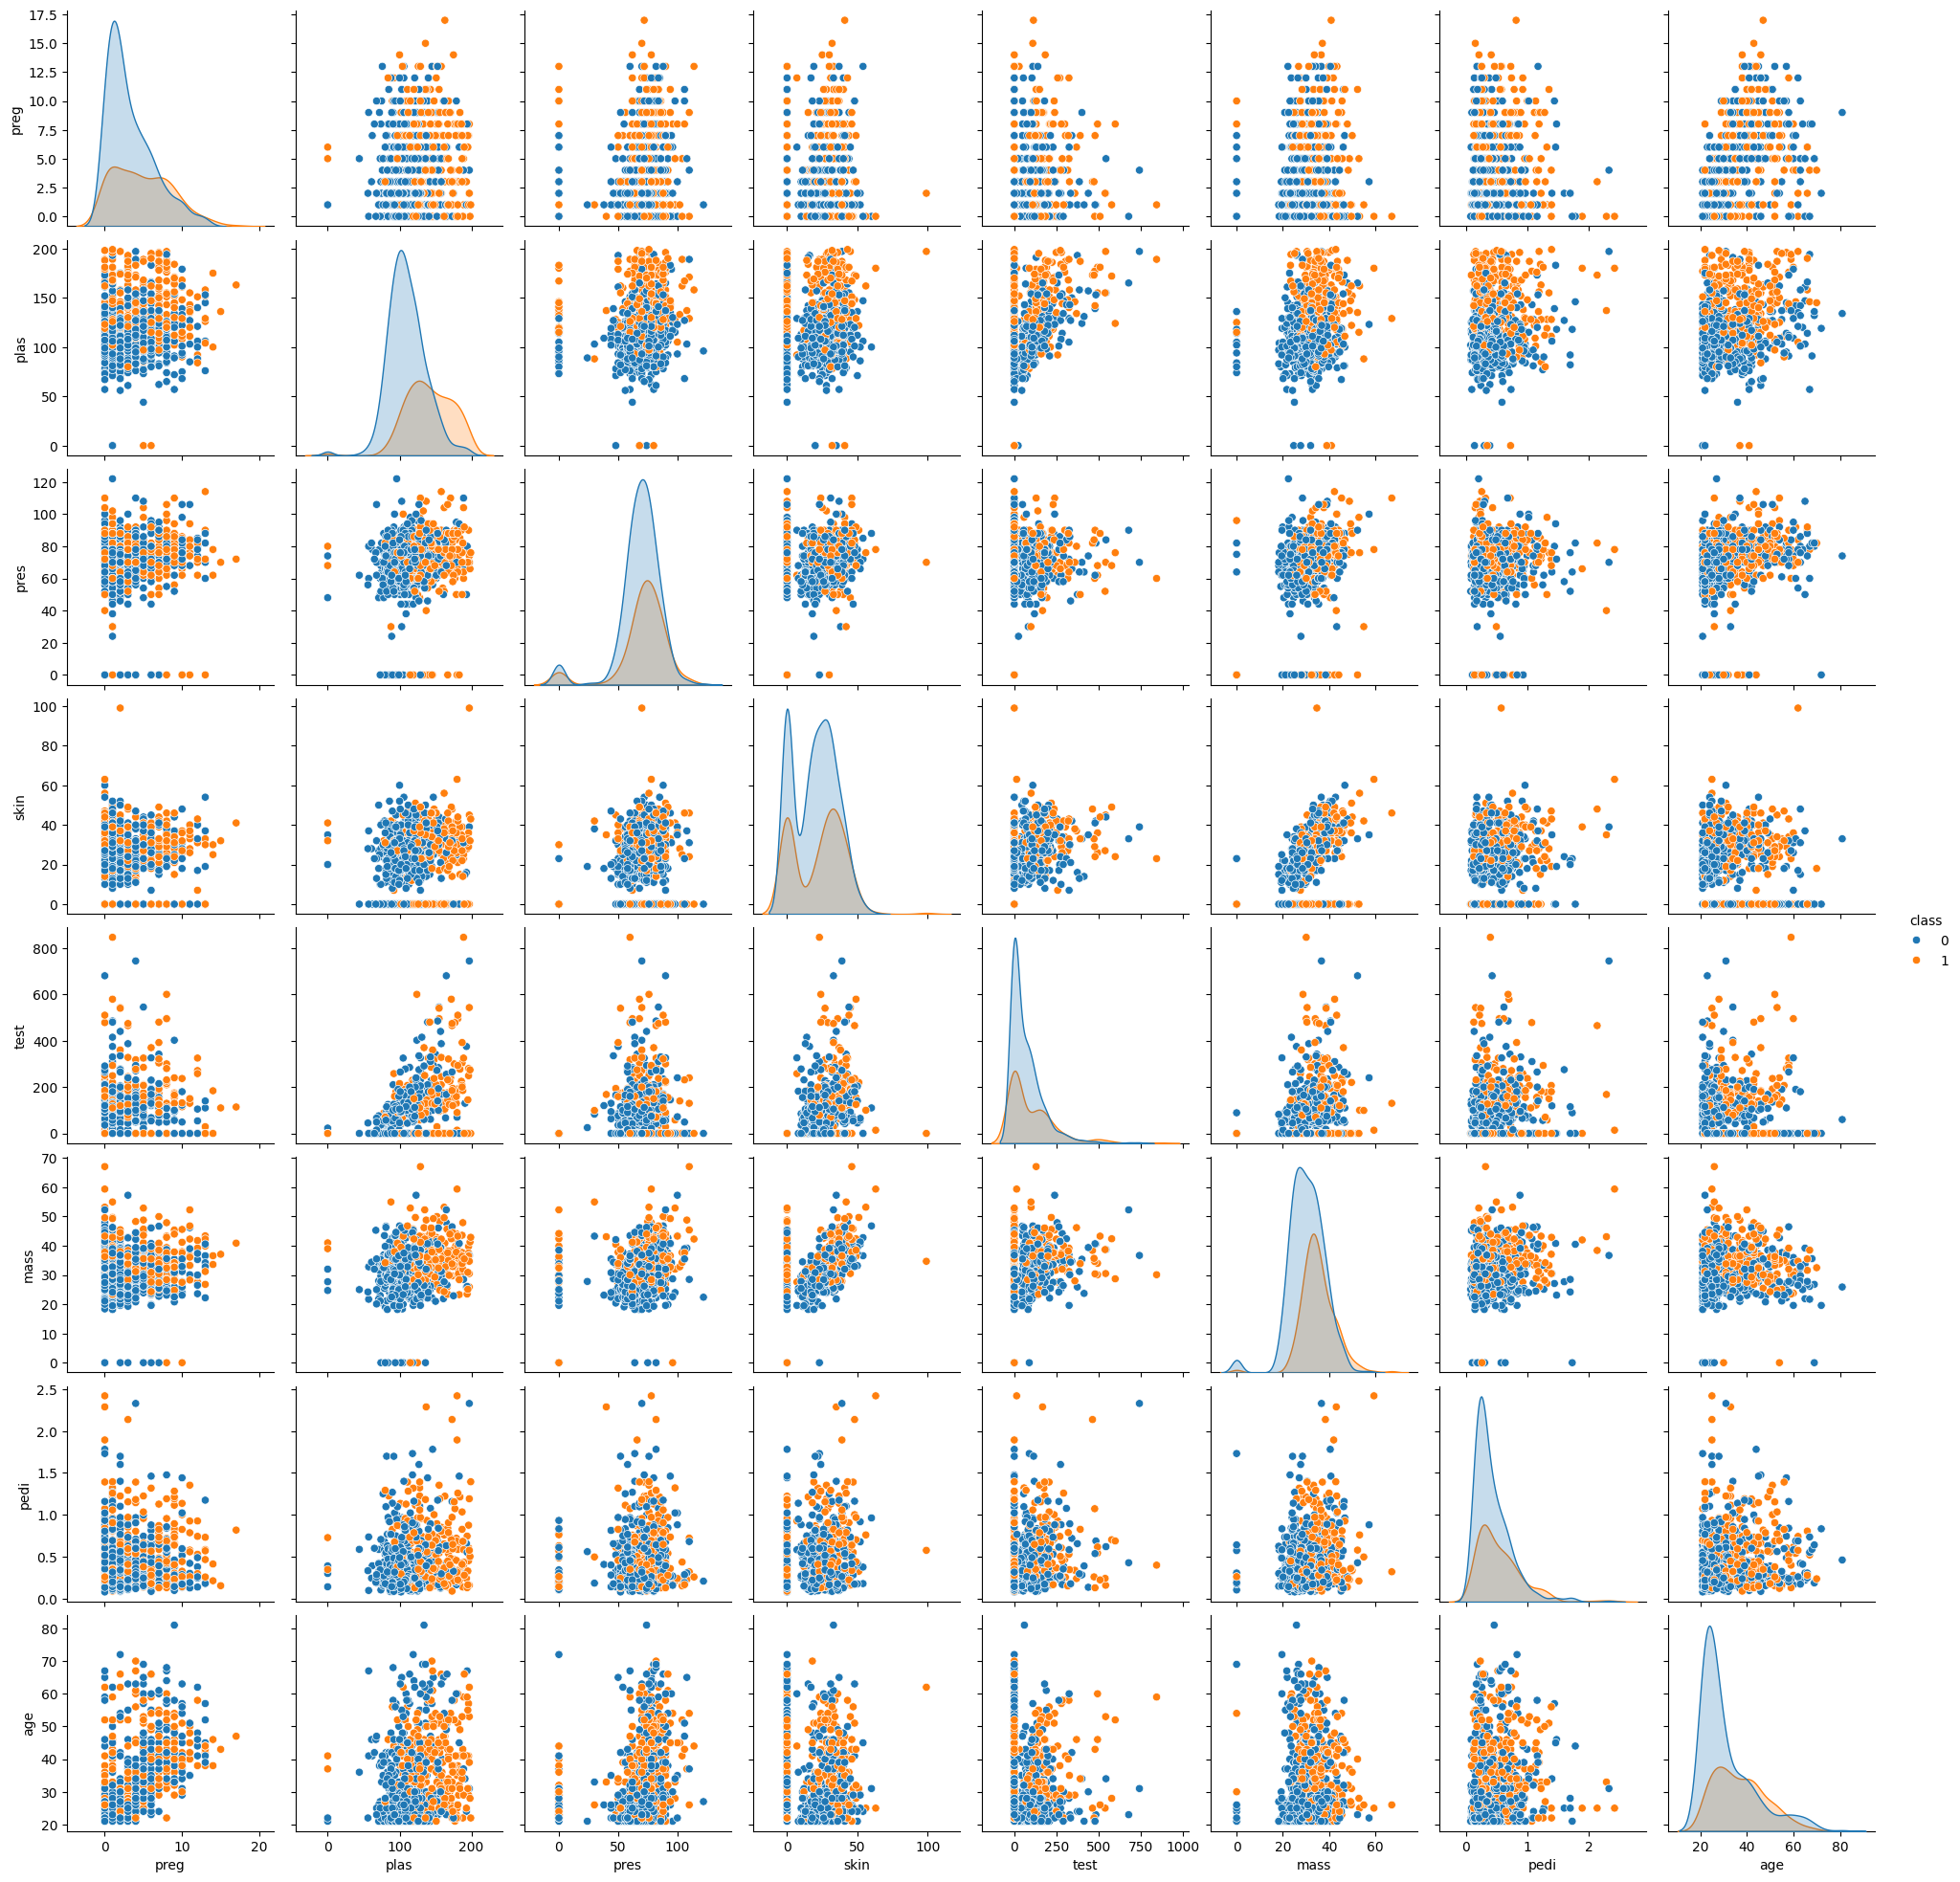

In [6]:
sns.pairplot(df, hue="class")

<Axes: >

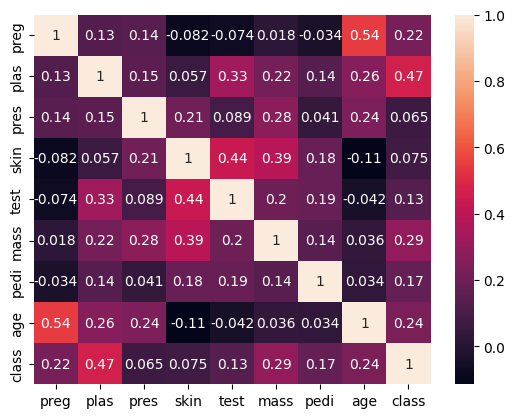

In [7]:
sns.heatmap(df.corr(), annot=True)

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [8]:
X = df[['preg','plas','mass','age']]
y = df['class']

Coeficientes de correlacion mas altos

In [9]:
seed = 42

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [11]:
dtc = DecisionTreeClassifier(max_depth=5)
bc = BaggingClassifier(estimator=dtc, n_estimators=100, random_state=seed)
cv = KFold(10)

In [12]:
results_bc_cv = cross_val_score(bc, X, y, cv=cv, scoring='accuracy')
print(results_bc_cv)
print(results_bc_cv.mean())
print(results_bc_cv.std())

[0.74025974 0.85714286 0.76623377 0.64935065 0.76623377 0.83116883
 0.85714286 0.87012987 0.75       0.76315789]
0.7850820232399179
0.065266093762578


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=seed)

results_rfc_cv = cross_val_score(rfc, X, y, cv=cv, scoring='accuracy')
print(results_rfc_cv)
print(results_rfc_cv.mean())
print(results_rfc_cv.std())

[0.72727273 0.85714286 0.75324675 0.5974026  0.77922078 0.83116883
 0.85714286 0.84415584 0.72368421 0.75      ]
0.7720437457279563
0.07675482452844708


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
dtc = DecisionTreeClassifier(max_depth=5)
ac = AdaBoostClassifier(estimator=dtc, n_estimators=30, random_state=seed)
cv = KFold(10)

results_ac_cv = cross_val_score(ac, X, y, cv=cv, scoring='accuracy')
print(results_ac_cv)
print(results_ac_cv.mean())
print(results_ac_cv.std())

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

[0.71428571 0.75324675 0.64935065 0.68831169 0.74025974 0.75324675
 0.81818182 0.76623377 0.67105263 0.73684211]
0.7291011619958988
0.04719926231868449


C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=seed)
cv = KFold(10)

results_gbc_cv = cross_val_score(gbc, X, y, cv=cv, scoring='accuracy')
print(results_gbc_cv)
print(results_gbc_cv.mean())
print(results_gbc_cv.std())

[0.74025974 0.84415584 0.7012987  0.67532468 0.77922078 0.77922078
 0.83116883 0.85714286 0.71052632 0.76315789]
0.7681476418318524
0.059263840597905695


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [18]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=100, random_state=seed)
cv = KFold(10)

results_xgbc_cv = cross_val_score(xgbc, X, y, cv=cv, scoring='accuracy')
print(results_xgbc_cv)
print(results_xgbc_cv.mean())
print(results_xgbc_cv.std())

[0.67532468 0.77922078 0.7012987  0.66233766 0.72727273 0.75324675
 0.81818182 0.84415584 0.67105263 0.68421053]
0.7316302118933699
0.061412021886782624


### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [19]:
results = pd.DataFrame([results_bc_cv.mean(), results_rfc_cv.mean(), results_ac_cv.mean(), results_gbc_cv.mean(), results_xgbc_cv.mean()],
                       columns=["cv_mean_accuracy"],
                       index=['Bagging', "RandomForest", "AdaBoosting", "GradientBoosting", "XGB"])

results

,cv_mean_accuracy
Bagging,0.785082
RandomForest,0.772044
AdaBoosting,0.729101
GradientBoosting,0.768148
XGB,0.731630


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 4)
(154, 4)
(614,)
(154,)


In [21]:
RandomForestClassifier()

RandomForestClassifier()

In [22]:
parameters = {
    "n_estimators": [40, 50, 80],
    "max_depth": [2,3,4],
    "max_features": [2,3,4],
    "max_leaf_nodes": [8,10,12]
}

In [23]:
3 * 5 * 3* 3 * 5

675

In [24]:
rfc_gs = GridSearchCV(RandomForestClassifier(random_state=seed), parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'max_leaf_nodes': [8, 10, 12],
                         'n_estimators': [40, 50, 80]},
             scoring='accuracy', verbose=2)

In [25]:
print(rfc_gs.best_estimator_)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)


RandomForestClassifier(max_depth=4, max_features=3, max_leaf_nodes=12,
                       n_estimators=80, random_state=42)
0.7785552445688392
{'max_depth': 4, 'max_features': 3, 'max_leaf_nodes': 12, 'n_estimators': 80}


In [26]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [27]:
final_rfc = rfc_gs.best_estimator_

final_rfc.fit(X_train, y_train)
y_pred = final_rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7727272727272727
0.6545454545454545
[[83 16]
 [19 36]]


In [28]:
results_bc_cv = cross_val_score(final_rfc, X, y, cv=cv, scoring='accuracy')
print(results_bc_cv)
print(results_bc_cv.mean())
print(results_bc_cv.std())

[0.72727273 0.84415584 0.74025974 0.61038961 0.76623377 0.81818182
 0.83116883 0.83116883 0.73684211 0.78947368]
0.7695146958304854
0.06706706171447058


In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=seed)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7467532467532467
0.7090909090909091
[[76 23]
 [16 39]]


In [30]:
results_bc_cv = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=seed), X, y, cv=cv, scoring='accuracy')
print(results_bc_cv)
print(results_bc_cv.mean())
print(results_bc_cv.std())

[0.72727273 0.85714286 0.75324675 0.5974026  0.77922078 0.83116883
 0.85714286 0.84415584 0.72368421 0.75      ]
0.7720437457279563
0.07675482452844708


In [31]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [32]:
parameters = {
    "n_estimators": [50, 150, 200, 300],
    "max_depth": [1,2,3],
    "learning_rate": [0.005,0.01,0.05],
}

gbc_gs = GridSearchCV(GradientBoostingClassifier(random_state=seed), parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

gbc_gs.fit(X_train, y_train)

print(gbc_gs.best_estimator_)
print(gbc_gs.best_score_)
print(gbc_gs.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=50,
                           random_state=42)
0.7785419165667067
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}


In [33]:
final_gbc = gbc_gs.best_estimator_

final_gbc.fit(X_train, y_train)
y_pred = final_gbc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7662337662337663
0.5818181818181818
[[86 13]
 [23 32]]


In [34]:
results_gbc_cv = cross_val_score(final_gbc, X, y, cv=cv, scoring='accuracy')
print(results_gbc_cv)
print(results_gbc_cv.mean())
print(results_gbc_cv.std())

[0.7012987  0.81818182 0.76623377 0.64935065 0.76623377 0.83116883
 0.81818182 0.84415584 0.73684211 0.76315789]
0.7694805194805194
0.058593306283455035


### 10. Conclusiones finales

El modelo elegido es el RF hiperparametrizado, que es el que mejor accuracy ha obtenido ante test, es decir, el que mejor generaliza.

In [35]:
final_rfc

RandomForestClassifier(max_depth=4, max_features=3, max_leaf_nodes=12,
                       n_estimators=80, random_state=42)

In [36]:
pd.DataFrame(final_rfc.feature_importances_, index=X.columns, columns=["Feature importance"]).sort_values("Feature importance", ascending=False)

,Feature importance
plas,0.560336
mass,0.212540
age,0.194809
preg,0.032316
